#Este arquivo, tem como objetivo fornecer embasamento para a tomada de desição de efetivação de investimento em Imóveis no condado de King (WS Dc), bem como recomendação de quais imóveis não investir.

##Aluno: Jarbas Carvalho
##RID: 32449

## As próximas seções deste documento irão tratar de:

1.   Análises exploratórias dos dados 
2.   Limpeza dos dados
3.   Insights
4.   Conclusões

##1 - Análise exploratória dos dados


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

kc_house = pd.read_csv('kc_house_data.csv')
kc_house.info()
print("-"*20)
kc_house
#Não encontramos dados dispariados, ou seja, dados incompletos na base de dados, em todas as colunas temos 21613 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 2 - Limpeza de dados
A linha de raciocínio que usamos, não apresentou necessidade de fazer qualquer tratemento de dados


##3 - Insights
Procuramos fatores que poderiam influenciar nas vendas do imóveis, bem como no valor de venda os subtópicos ka seguir irão abordar allgumas destas questões.

## 3.1 -Vendas por Período
Não encotramos relevância nesta informação, visto que a base de dados é relativamente, pequena se consideranda a linha temporal.

In [3]:
#Verificação de vendas por período
VendasPorPeriodo = pd.to_datetime(kc_house['date']).dt.to_period('M').value_counts()
VendasPorPeriodo.sort_index()

2014-05    1768
2014-06    2180
2014-07    2211
2014-08    1940
2014-09    1774
2014-10    1878
2014-11    1411
2014-12    1471
2015-01     978
2015-02    1250
2015-03    1875
2015-04    2231
2015-05     646
Freq: M, Name: date, dtype: int64

## 3.2 - Vendas por ZipCode
Exploramos os dados considerando os Zipcodes e aqui encontramos alguns pontos importantes.

In [4]:
kc_house.zipcode.value_counts()


98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Analisando as amplitudes dos preço por zipcode encontrarmos algus que possuem uma amplitude relativamente interessante.

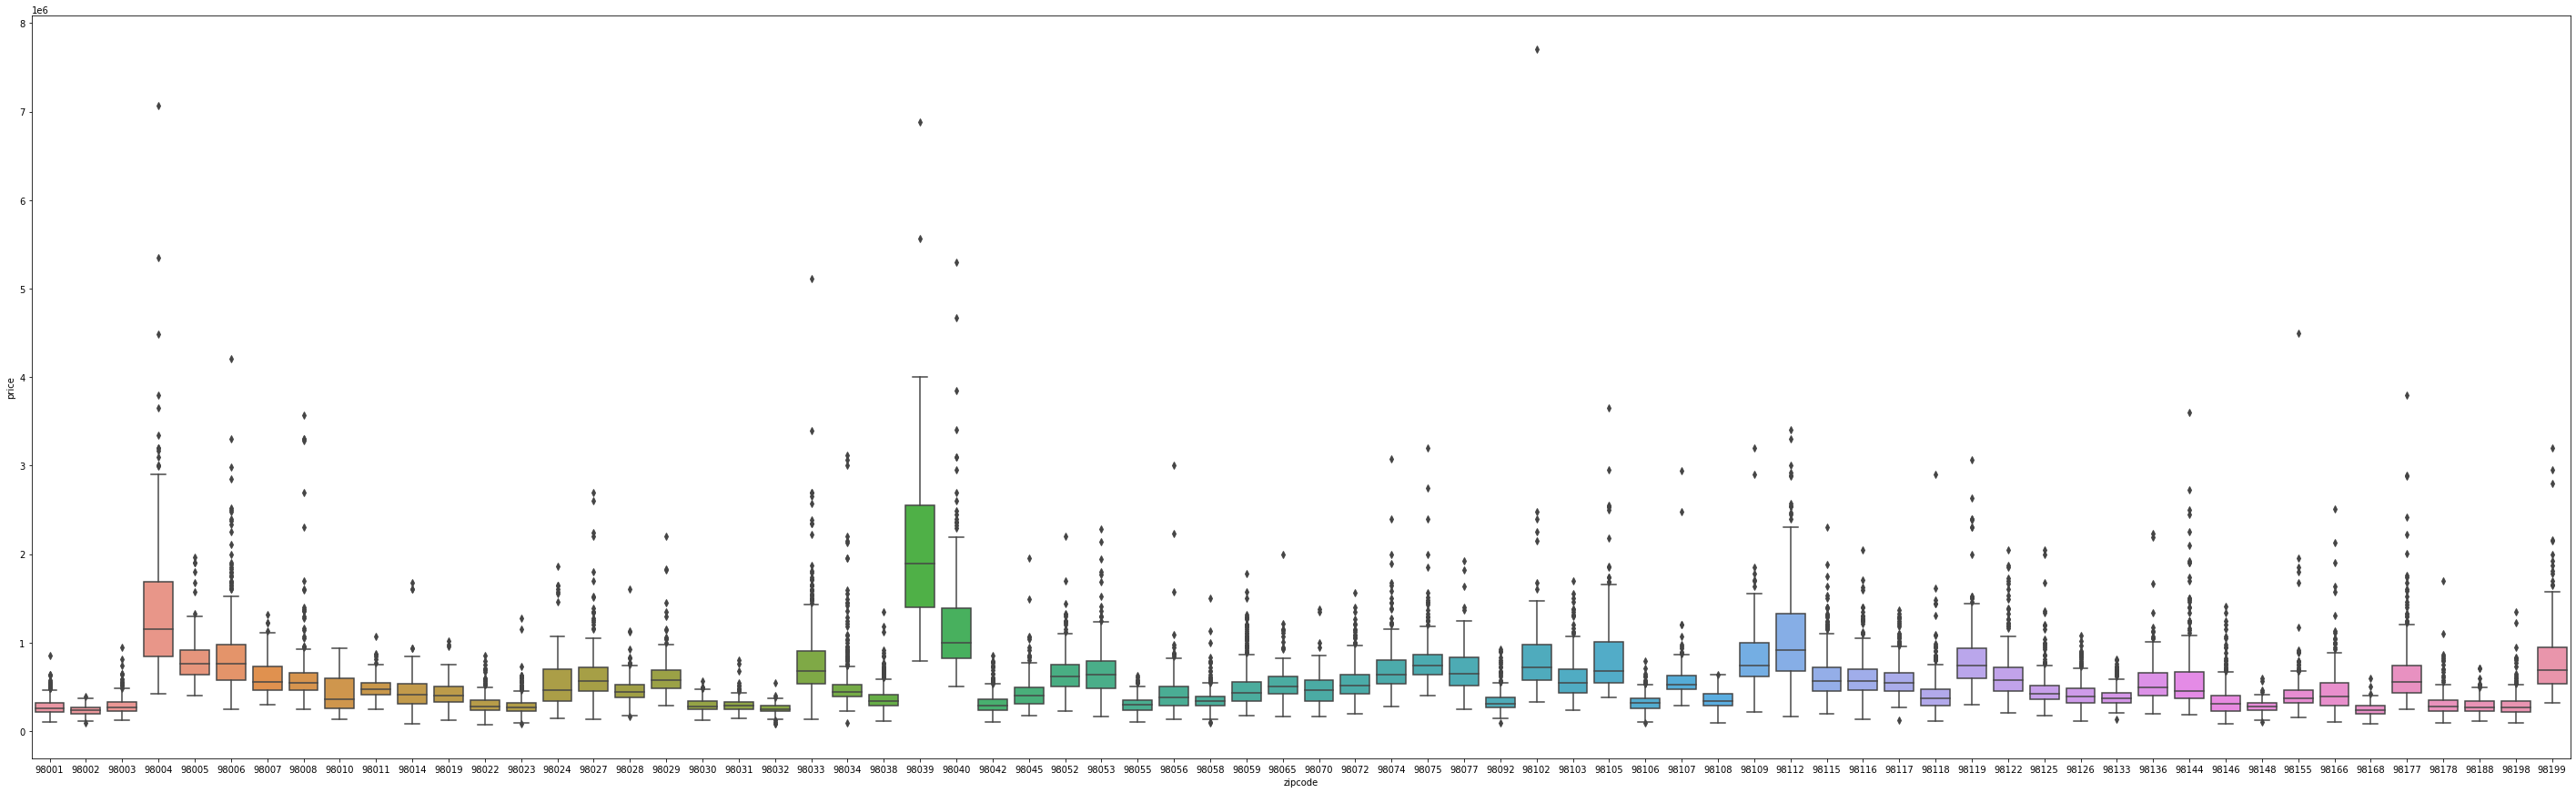

In [5]:
#Encontrando disparidades no preço
plt.figure(figsize=(50,15))
sns.boxplot(x='zipcode', y= 'price', data=kc_house)

As propriedades dentro do zipcode 98039 apresentaram a maior amplitude de preços, estando na casa dos ~750K e indo até ~7Milhões

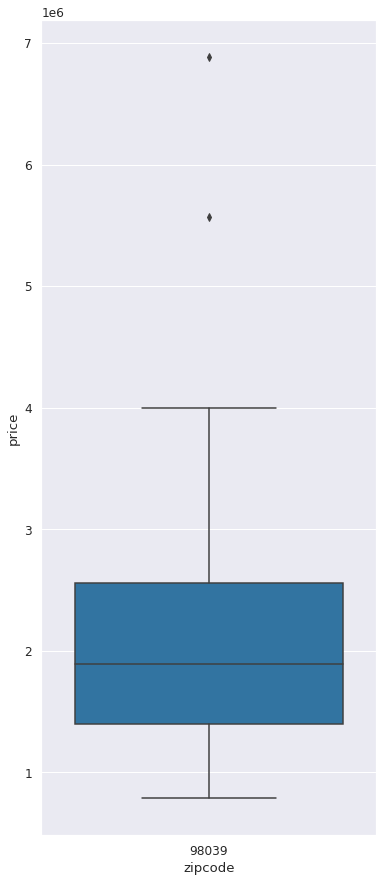

In [30]:
# O Zipcode 98039 apresenta a maior amplitude de preços, bem como 

plt.figure(figsize=(6,15))
kc_house_zipcode1 = kc_house[kc_house.zipcode == 98039]
sns.boxplot(x='zipcode', y= 'price', data=kc_house_zipcode1)

## 3.2.1 - Indicaçao de qual empreendimento investir


In [31]:
#visualização dos imóveis no mapa
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.1)

import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

# Map Coordinates
import requests
import urllib.parse

df = kc_house_zipcode1
# map with price hues
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color='price',
                        hover_name="price",
                        hover_data=['id','bedrooms', 'bathrooms', 'sqft_living', 
                                    'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'grade', 'yr_built'],
                        #title = 'Historical King County House Sale Price',
                        zoom=10.9,
                        height=850,
                        #animation_frame="yr_built",
                        #animation_group="month",
                        color_continuous_scale='Portland',
                        mapbox_style="open-street-map",
                        template='ggplot2')
#tight layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# export as an html file 
fig.write_html('KingCountyHouseSalePricesMap.html')
fig.show()

In [19]:
#sns.pairplot(kc_house)

Encontrando as correlações mais fortes dos emprendimentos destas região.

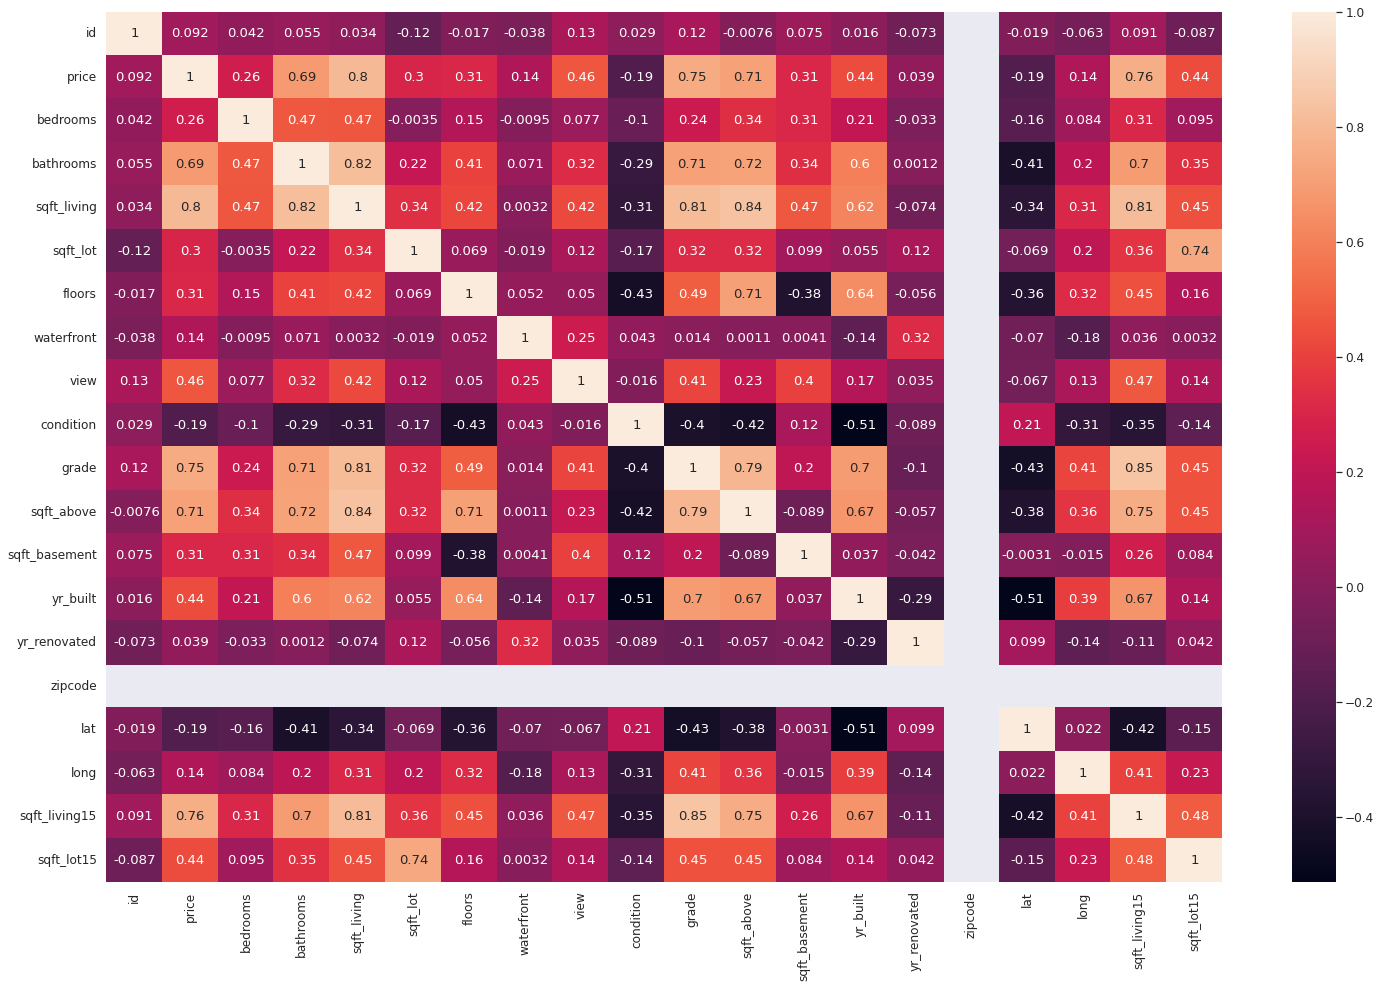

In [20]:

plt.figure(figsize=(25, 16))
sns.heatmap(kc_house_zipcode.corr(), annot= True)

Considerando que o objetivo da pesquisa é investimento, vamos analisar quais os pontos que possuem maior relevância se comparada com o preço. 

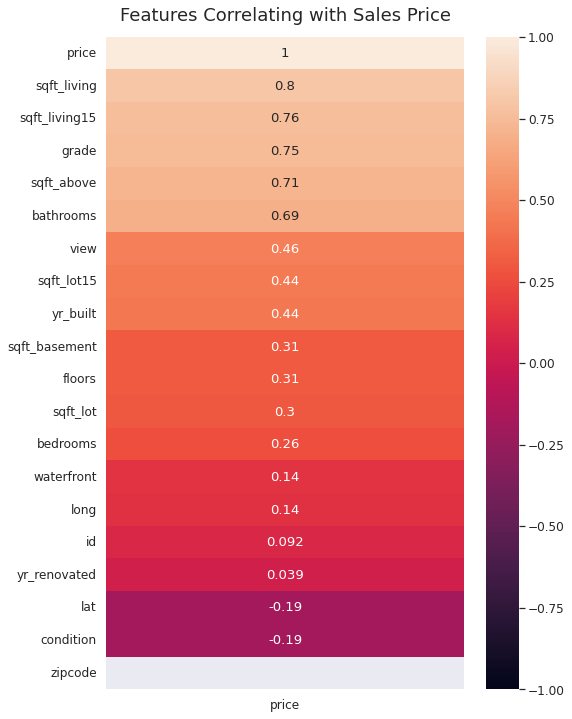

In [21]:
#Analisando quais itens da base de dados para esse zipcode em especial, possuem mais relevância para a formação do preço de venda.
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(kc_house_zipcode.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

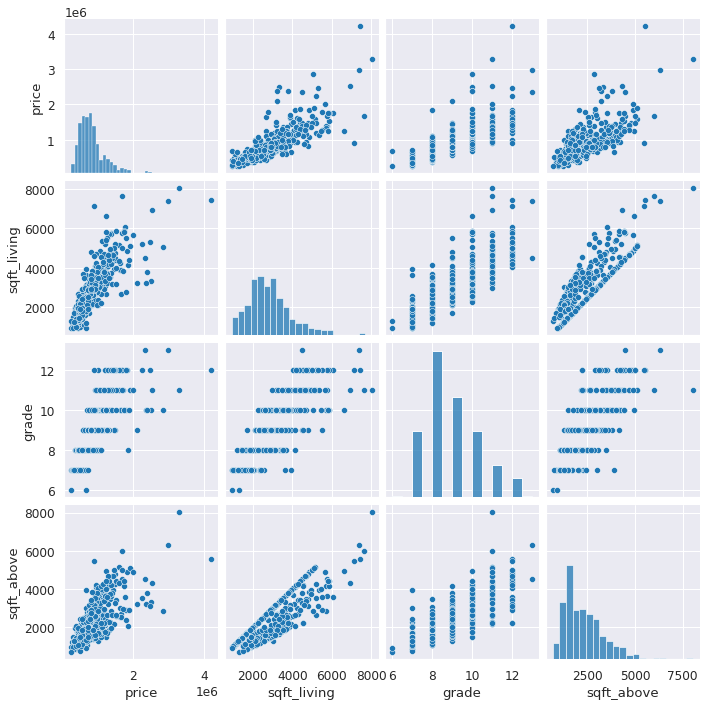

In [22]:
sns.pairplot(data = kc_house_zipcode[['price','sqft_living', 'grade', 'sqft_above']])

#sns.pairplot(data=df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']], markers='+')

In [23]:
kc_house_zipcode.sort_values(by = ['long'])
#df.sort_values(by=['col1']))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2179,3343301920,20150302T000000,1650000.0,3,2.75,2690,8890,2.0,1,4,...,10,2690,0,1975,1991,98006,47.5487,-122.197,2940,8890
3252,3343301910,20141020T000000,1000000.0,5,4.50,2120,8944,2.0,1,4,...,8,2120,0,1939,1963,98006,47.5488,-122.197,2870,8944
8784,3343302110,20150306T000000,1800000.0,3,3.00,2790,13295,2.0,1,4,...,10,2370,420,1933,1989,98006,47.5466,-122.197,3140,11949
13697,3343301490,20140909T000000,818500.0,5,3.50,4790,12957,2.0,0,1,...,9,3110,1680,2005,0,98006,47.5469,-122.194,2620,13538
8049,4134300175,20150417T000000,1851000.0,4,2.50,4120,14866,1.0,1,4,...,8,2070,2050,1965,0,98006,47.5571,-122.193,3620,19729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968,4139460290,20140828T000000,898000.0,3,2.50,3530,9753,2.0,0,0,...,10,3530,0,1997,0,98006,47.5539,-122.103,3220,9234
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
1841,4139460200,20150325T000000,905000.0,4,2.50,3330,9557,2.0,0,0,...,10,3330,0,1995,0,98006,47.5526,-122.102,3360,9755


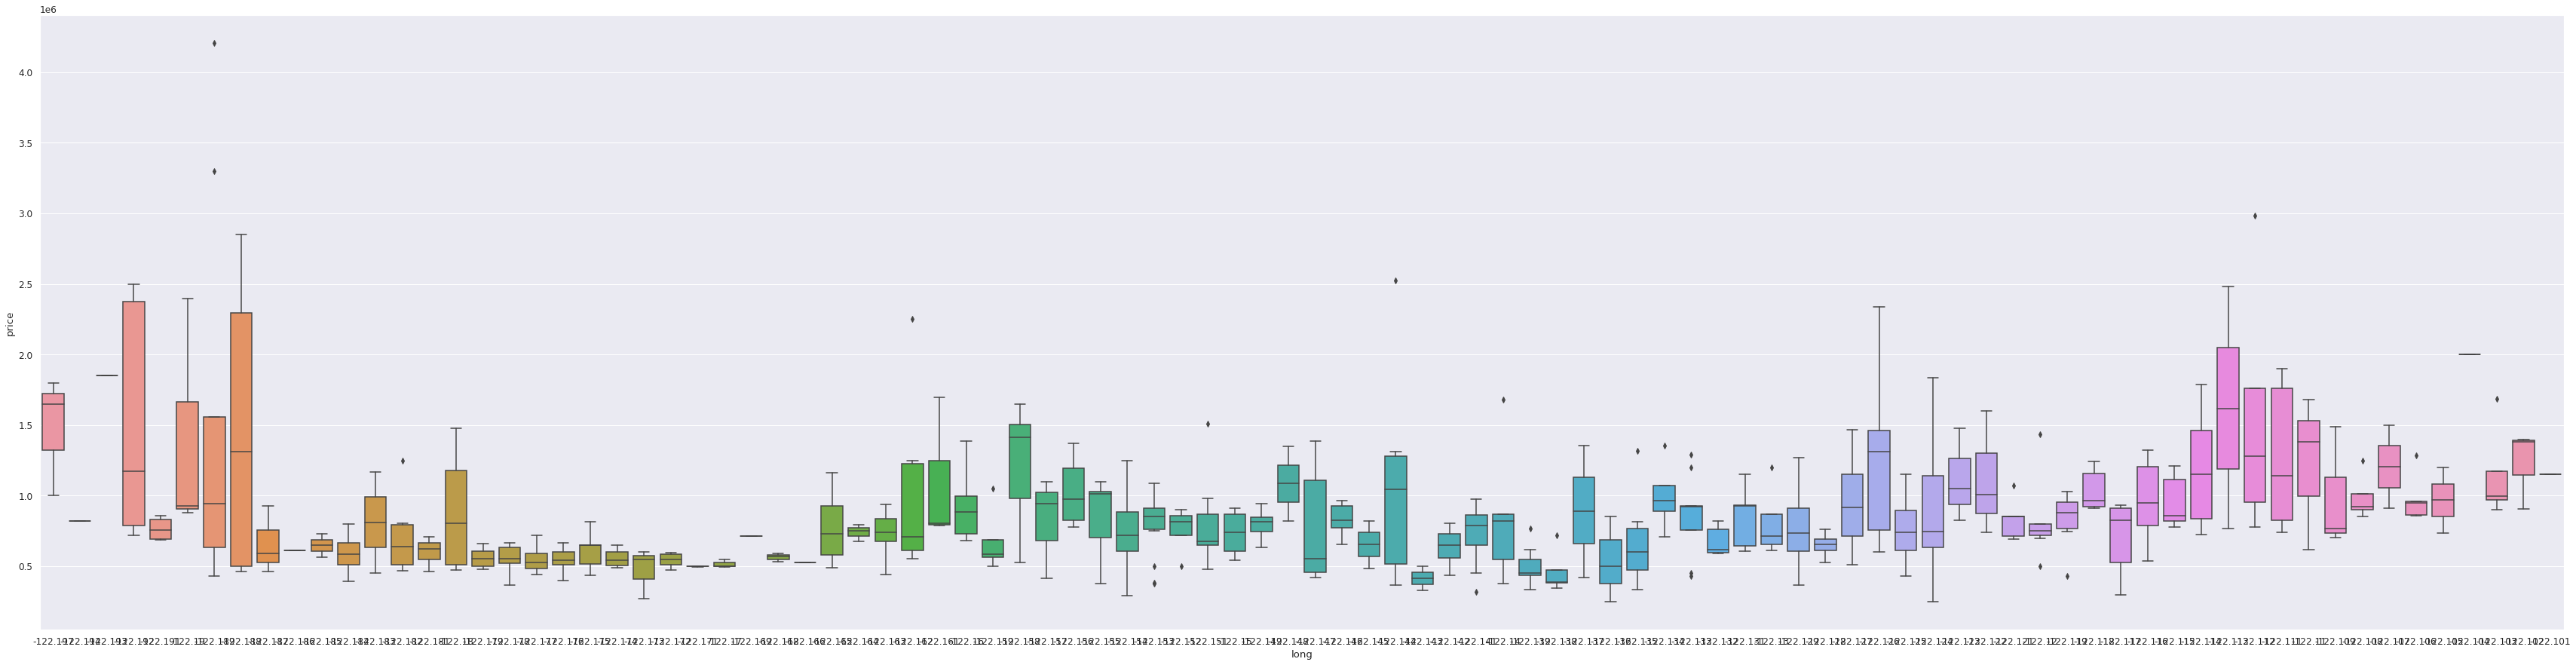

In [26]:
plt.figure(figsize=(60,15))
sns.boxplot(x='long', y= 'price', data=kc_house_zipcode)

In [25]:
#kc_house.zipcode.value_counts()
kc_house_zipcode.long.value_counts()
#plt.pie(kc_house_zipcode.yr_built.value_counts())
#plt.show()

-122.153    15
-122.114    12
-122.128    11
-122.124    11
-122.156    10
            ..
-122.193     1
-122.186     1
-122.101     1
-122.166     1
-122.104     1
Name: long, Length: 94, dtype: int64

Observando o posicionamento geográficos dos empreendimentos, notamos que eles estão concentrados em Medina, nas redondesas do Overlake Golf & Country Club e são os que estão predominantemente na logitude -122.236 a saber (id):


1.   3262300235
2.   3262300322
3.   3262301355
4.   2525049266
5.   2525049246

## 3.2.2- Indicação de qual empreendimento NÃO comprar

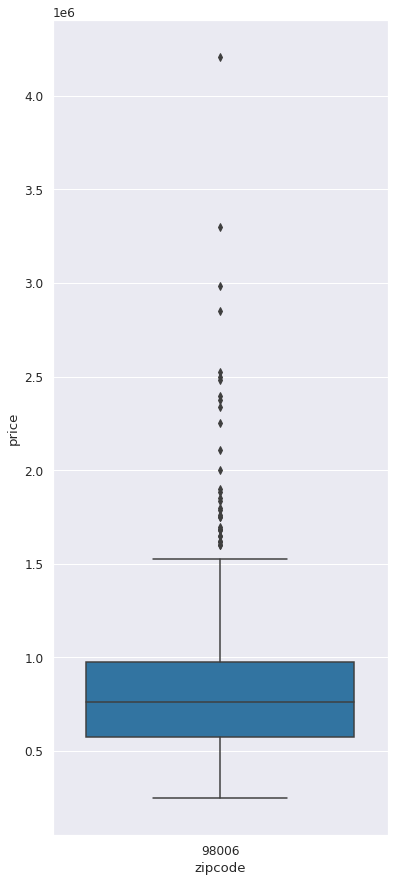

In [15]:

plt.figure(figsize=(6,15))
kc_house_zipcode = kc_house[kc_house.zipcode == 98006]
sns.boxplot(x='zipcode', y= 'price', data=kc_house_zipcode)

In [16]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.1)

import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

# Map Coordinates
import requests
import urllib.parse

df = kc_house_zipcode
# map with price hues
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color='price',
                        hover_name="price",
                        hover_data=['id','bedrooms', 'bathrooms', 'sqft_living', 
                                    'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'grade', 'yr_built'],
                        #title = 'Historical King County House Sale Price',
                        zoom=10.9,
                        height=850,
                        #animation_frame="yr_built",
                        #animation_group="month",
                        color_continuous_scale='Portland',
                        mapbox_style="open-street-map",
                        template='ggplot2')
#tight layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# export as an html file 
fig.write_html('KingCountyHouseSalePricesMap.html')
fig.show()

In [17]:
kc_house_zipcode


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
141,1777500060,20140708T000000,527700.0,5,2.50,2820,9375,1.0,0,0,...,8,1550,1270,1968,0,98006,47.5707,-122.128,2820,9375
144,6071600370,20150227T000000,500000.0,4,2.25,2030,8517,1.0,0,0,...,8,1380,650,1961,0,98006,47.5495,-122.174,2230,8824
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
167,1836980160,20150324T000000,807100.0,4,2.50,2680,4499,2.0,0,0,...,9,2680,0,1999,0,98006,47.5650,-122.125,2920,4500
174,1687900520,20140929T000000,673000.0,4,2.25,2590,8190,2.0,0,0,...,8,2590,0,1980,0,98006,47.5619,-122.125,2260,8335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21237,9293000170,20150408T000000,800000.0,5,2.50,3410,4726,2.0,0,0,...,9,3410,0,2007,0,98006,47.5459,-122.184,2810,5129
21248,2911700010,20150303T000000,1080000.0,3,2.50,2240,21477,2.0,0,2,...,8,2240,0,1995,0,98006,47.5745,-122.180,2930,21569
21258,2424059163,20140709T000000,1240000.0,5,3.50,5430,10327,2.0,0,2,...,10,4010,1420,2007,0,98006,47.5476,-122.116,4340,10324
21333,2424059174,20150508T000000,1999950.0,4,3.25,5640,35006,2.0,0,2,...,11,4900,740,2015,0,98006,47.5491,-122.104,4920,35033


Considerando a localidade e preços informados, NÃO recomendamos a compra dos Id abaixo, pois estão localizados na parte onde o valor dos imóceis é o menor e seu preço se comparado com a média é muito maior:

1.   6065300370
2.   6072800246
3.   3303850390
4.   6065300840
5.   3377900195



#4 - Conclusão

Optamos por fazer uma análise segmentar, buscando quais áreas dentro do condado tem os maiores e menores preços. De modo que as áreas que apresentaram o maior valor de imóvel foram mais propensas a fazer o investimento e as áreas com o menor preço a recomendação de não fazer o investimento.

Devido a massa de dados, possuir um histórico bem curto, não encontramos viabilidade para analisar as vendas ocorridas dentro de um tempo em específico. 